<a href="https://colab.research.google.com/github/ctkerns/cap4630_spring2020/blob/master/hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

##Problem 1

In [0]:
_w = 10
_mu = 4

def get_random_data(w, b, mu, sigma, m):
    data = []
    labels = []

    for i in range(m):
        # c chosen with equal probability of 0 and 1
        c = np.floor(np.random.rand()*2)
        labels.append(c)

        # choose n as noise with mean mu and standard deviation sigma
        n = np.random.normal(mu, sigma)

        # calculate data x_1 and x_2
        x_1 = np.random.rand()
        x_2 = w*x_1 + b + (-1)**c*n
        data.append([x_1, x_2])

    return data, labels

def display_random_data(data, labels):
    for i, point in enumerate(data):
        if labels[i] == 0:
            plt.scatter(point[0], point[1], color='blue')
        elif labels[i] == 1:
            plt.scatter(point[0], point[1], color='red')

# generate separate sets of training and testing data
training = get_random_data(_w, 0, _mu, 1, 160)
test = get_random_data(_w, 0, _mu, 1, 40)

##Problem 2
Train the network

In [0]:
# create the network
network = tf.keras.models.Sequential()

output_layer = tf.keras.layers.Dense(units=1, activation='relu')
network.add(output_layer)

network.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# train the network
history = network.fit(training[0], training[1], epochs=500, batch_size=8)

###Scatterplot

The network will take the two inputs and multiply them each by a weight.

$x_2w_2 = x_1w_1\quad\Rightarrow\quad\dfrac{x_2}{x_1} = \dfrac{w_1}{w_2}$  

The original equation was:  

$x_2 = x_1w\quad\Rightarrow\quad w=\dfrac{x_2}{x_1}$  

Substituting $\dfrac{x_2}{x_1}$ from the network equation gives:  

$w = \dfrac{w_1}{w_2}$  

Therefore, the slope of the model's line will be the first weight divided by the second weight.  

Black line: Seperating line of the training data.  
Green line: Seperating line of the model.  
Blue dot: c = 0
Red dot: c = 1


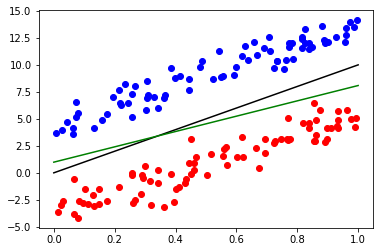

In [4]:
# display the separating lines
display_random_data(training[0], training[1])
plt.plot([0, 1], [0, _w], color='black')

model_weight = output_layer.get_weights()
slope = np.abs(model_weight[0][0]/model_weight[0][1])
intercept = model_weight[1][0]
plt.plot([0, 1], [intercept, intercept + slope], color='green')

###Heatmap

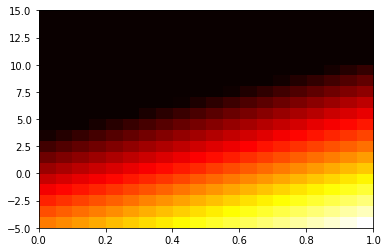

In [5]:
startX = 0
endX = 1
startY = -5
endY = 15

xRange = endX - startX
yRange = endY - startY

density = 20

sample = []
for i in range(density):
    sample.append([])
    y = startY + i*(yRange/density)
    for j in range(density):
        # interpolate to find values for x, y
        x = startX + j*(xRange/density)
        value = network.predict([[x, y]])
        sample[i].append(value[0][0])

plt.imshow(sample, extent=[startX, endX, startY, endY], aspect='auto', origin='lower', cmap='hot', interpolation='nearest')
plt.show()


##Problem 3

0.0
